[Vídeo da Oficina](https://www.youtube.com/watch?v=xa1-m0BB8dE)

# Erro de Predição - 1

In [18]:
library(ggplot2)
library(magrittr)
set.seed(5)

In [19]:
x <- runif(10)
y <- 2*x + rnorm(10)

Warning message in qt((1 - level)/2, df):
“NaNs produzidos”

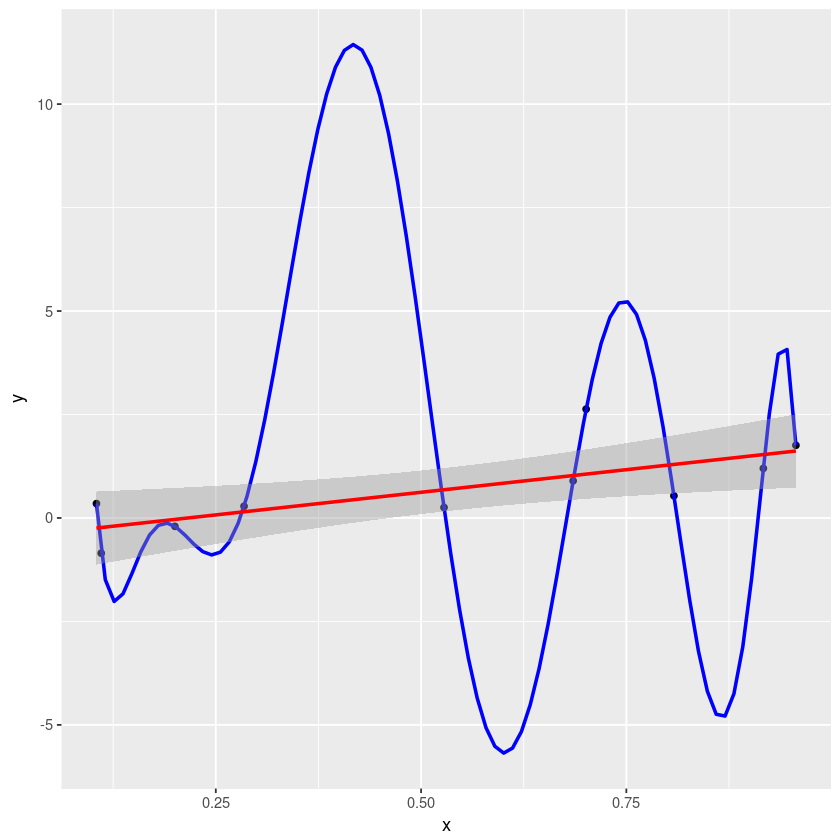

In [20]:
data.frame(x = x, y = y) %>%
  ggplot(aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 9), color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red")


In [21]:
set.seed(1)

In [22]:
x_novo <- runif(5)
y_novo <- 2*x + rnorm(5)

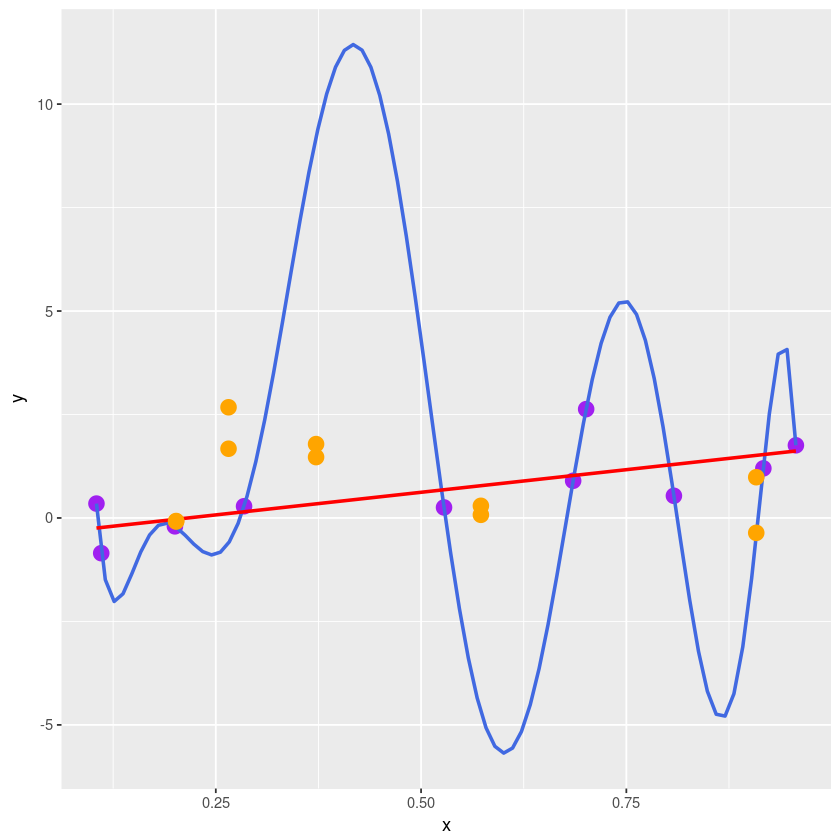

In [23]:
data.frame(x = x, y = y, x_novo = x_novo, y_novo = y_novo) %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(color = "purple", size = 4) +
  geom_smooth(method = "lm", formula = y ~ poly(x, 9), color = "royal blue", se = FALSE) +
  geom_smooth(method = "lm", formula = y ~ x, color = "red", se = FALSE)+
  geom_point(aes(x = x_novo, y = y_novo), color = "orange", size = 4)

O modelo de polinômio de grau 9 explica perfeitamente minha pequena amostra mas não consegue generalisar para novos dados. A seguir temos o erro quadrático médio do polinômio de grau 9 e da reta ajustada, 1º em relação aos dados usados para ajustar o modelo e depois em relação um novo conjunto de dados.  

In [24]:
modelo <- lm(y ~ poly(x, 9))
mean((modelo$fitted.values - y)^2)
mean((predict(modelo, data.frame(x = x_novo)) - y_novo)^2)

[1] 0

[1] 18.01037

In [29]:
modelo <- lm(y ~ x)
mean((modelo$fitted.values - y)^2)
mean((predict(modelo, data.frame(x = x_novo)) - y_novo)^2)

[1] 0.4147351

[1] 1.691855

# 02 - erro de predicao - censo.R

In [33]:
library(ggplot2)
library(magrittr)
library(dplyr)
library(purrr)
library(tidyr)
set.seed(2)

In [34]:
# dados --------------------------------------------------------------
censo <- readRDS("/home/cloves/Documentos/data_science/oficinas_IME/amostra2017/machine-learning/data/censo.rds")
censo %<>% mutate(base = ifelse(runif(n()) > 0.3, "treino", "teste"))

In [38]:
censo

uf,escolaridade,renda,base
RR,5.7,685,teste
AP,6.0,683,treino
AC,4.5,526,treino
RO,4.9,662,teste
PA,4.7,536,treino
AM,5.5,627,treino
TO,4.5,520,teste
PB,3.9,423,treino
MA,3.6,343,treino
RN,4.5,513,treino


In [40]:
# visualização -------------------------------------------------------
dispersao_escolaridade_x_renda <- censo %>%
  filter(base == "treino") %>%
  ggplot(aes(x = escolaridade, y = renda)) +
  geom_point(size = 3) +
  coord_cartesian(xlim = c(3, 9),
                  ylim = c(-10, 1900)) +
  scale_color_manual(values = c("#F8766D", "#00BA38", "#619CFF"))

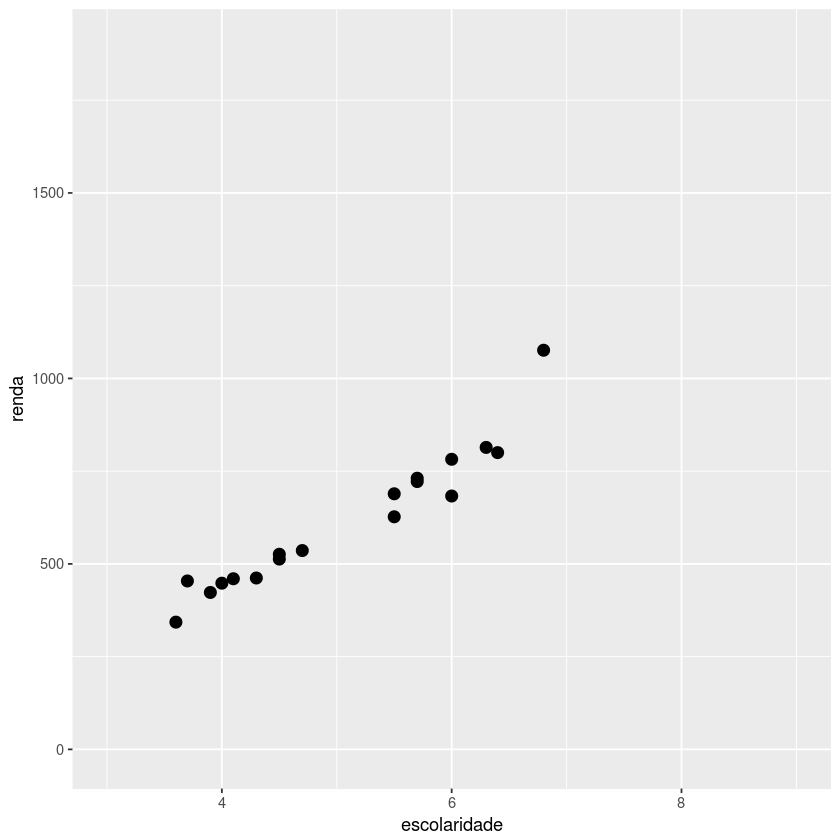

In [41]:
dispersao_escolaridade_x_renda

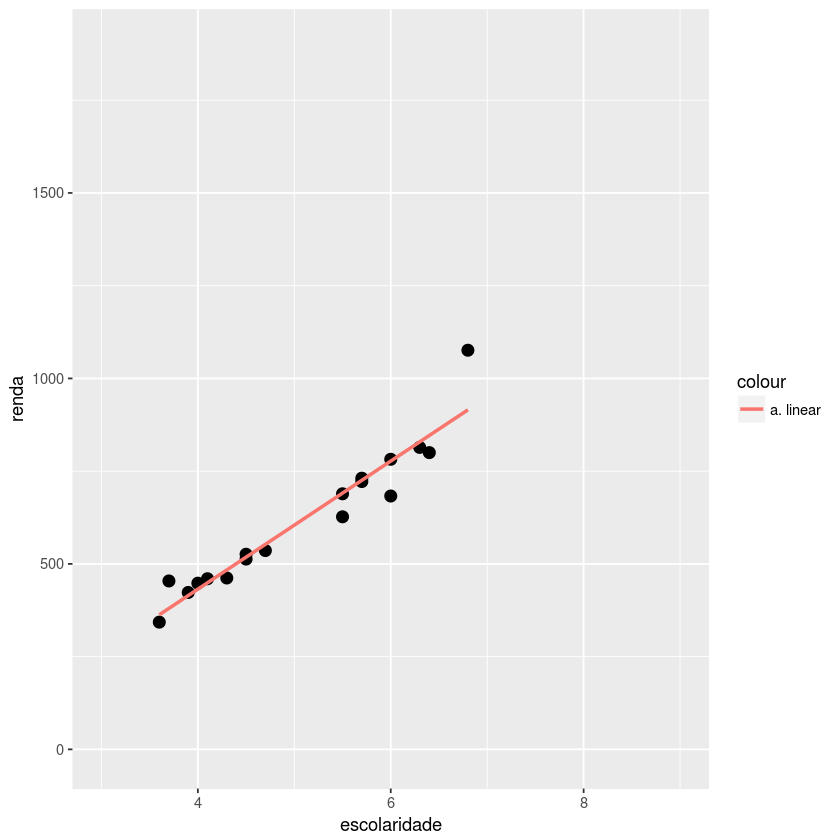

In [42]:
# adiciona modelo linear
p1 <- dispersao_escolaridade_x_renda + geom_smooth(aes(color = "a. linear"), method = "lm", formula = y ~ x, se = FALSE, fullrange = TRUE)
p1

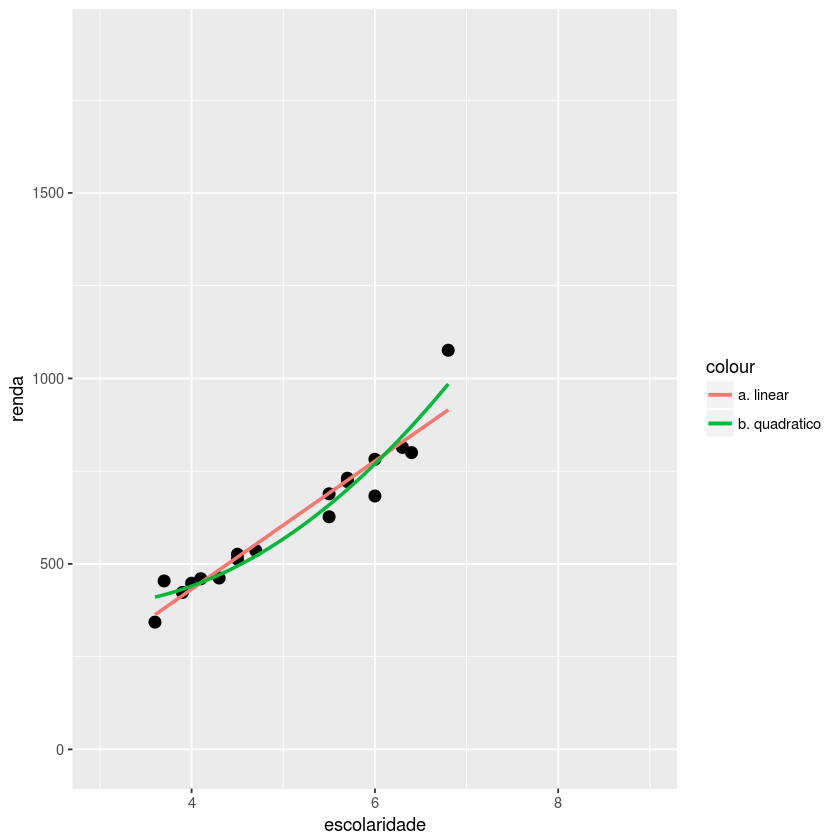

In [43]:
# adiciona modelo quadrático
p2 <- p1 + geom_smooth(aes(color = "b. quadratico"), method = "lm", formula = y ~ poly(x, 2), se = FALSE, fullrange = TRUE)
p2

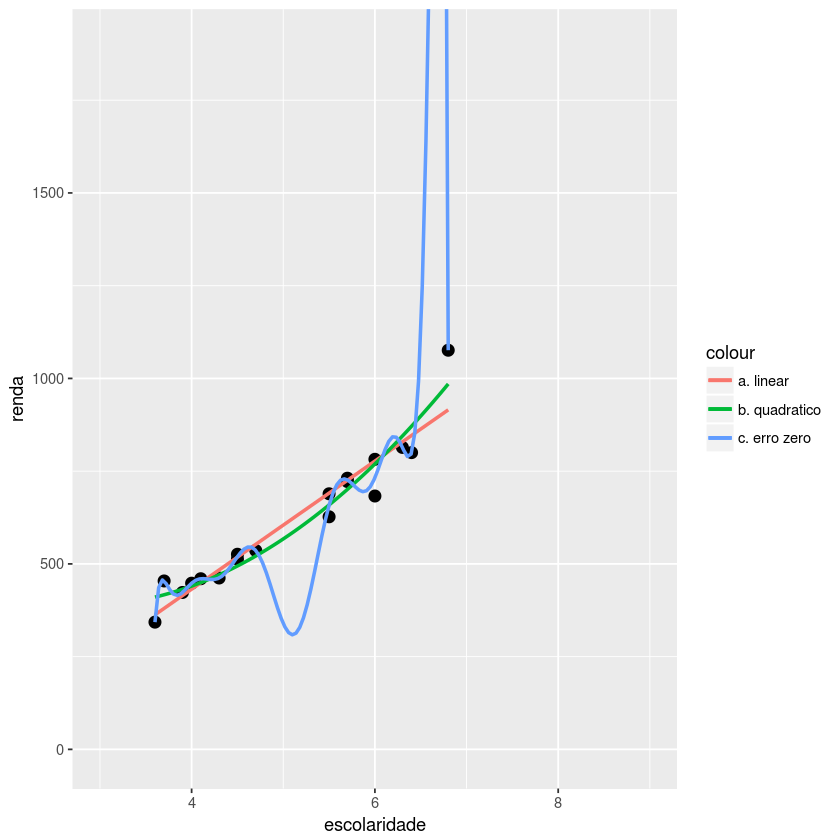

In [44]:
# adiciona modelo de polinômio
p3 <- p2 + geom_smooth(aes(color = "c. erro zero"), method = "lm", formula = y ~ poly(x, 13), se = FALSE, fullrange = TRUE)
p3


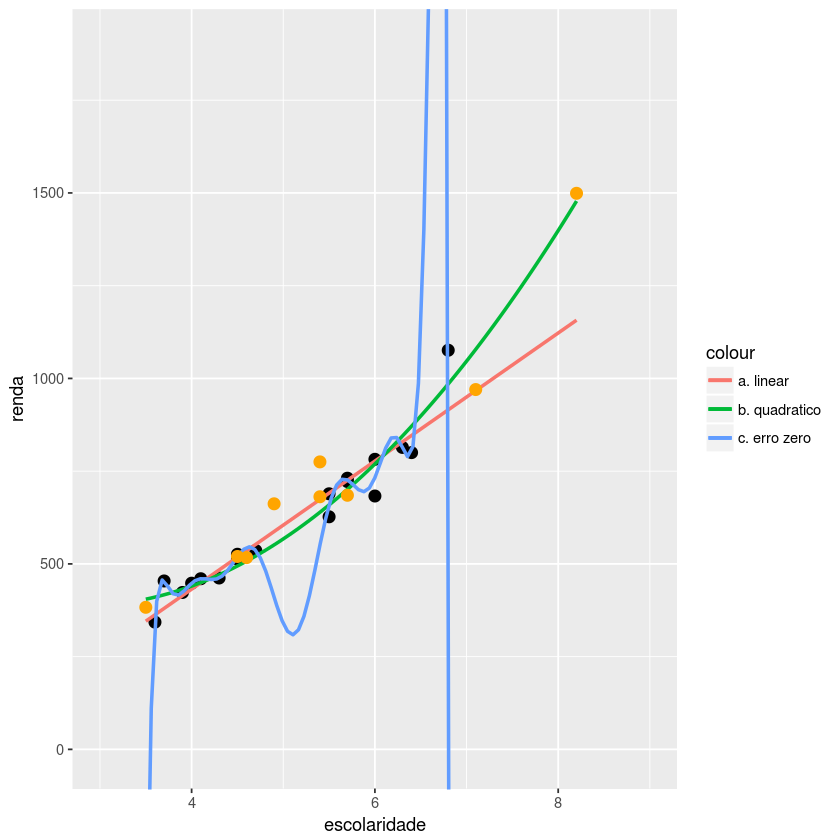

In [45]:
p3 + geom_point(data = censo %>% filter(base == "teste"), size = 3, color = "orange")

In [46]:
# Exercício
# Calcule o erro de predição e o erro de ajuste para cada grau de polinômio de
# 1 a 12.

ajusta_polinomio <- function(n) {
  lm(renda ~ poly(escolaridade, n), data = censo %>% filter(base == "treino"))
}

reqm <- function(modelo, particao) {
  dados <- censo %>% filter(base == particao)
  observado <- dados$renda
  esperado <- predict(modelo, newdata = dados)

  sqrt(mean((observado - esperado)^2))
}


In [50]:
# tentativa resposta

erro_ajuste <- c()
erro_predicao <- c()
for (n in 1:12) {
    modelo_poli_n <- ajusta_polinomio(n)
    erro_ajuste[n] <-reqm(modelo_poli_n, 'treino')
    erro_predicao[n] <- reqm(modelo_poli_n, 'teste')
}

Warning message:
“Ignoring unknown parameters: se”Warning message:
“Ignoring unknown parameters: se”Warning message:
“Ignoring unknown parameters: se”Warning message:
“Ignoring unknown parameters: se”

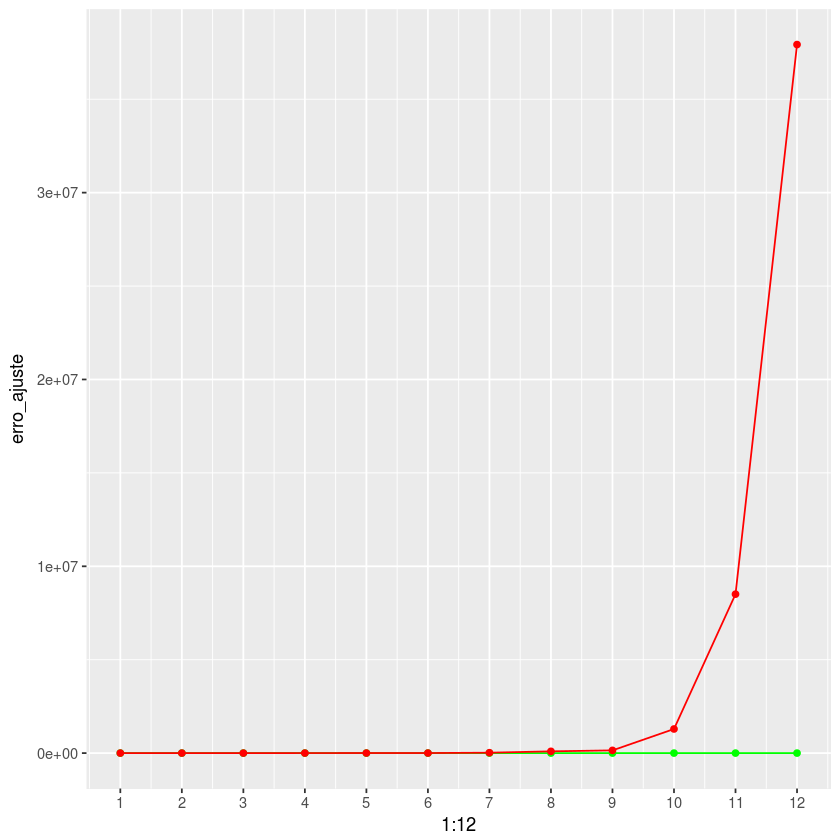

In [67]:
ggplot() +
    geom_point(aes(x = 1:12 , y= erro_ajuste), se=F, col='green') +
    geom_line(aes(x = 1:12 , y= erro_ajuste), se=F, col='green') +
    geom_point(aes(x = 1:12, y=erro_predicao), se=F, col='red') +
    geom_line(aes(x = 1:12, y=erro_predicao), se=F, col='red') +
    scale_x_continuous(breaks  = 1:12)

# 03 - cross-validation.R

In [26]:
set.seed(1)

In [27]:
x <- runif(100)
y <- 3*x + rnorm(100)
y[which.max(x)] <- 5 + y[which.max(x)]

In [28]:
x_novo <- runif(10)
y_novo <- 3*x + rnorm(10)

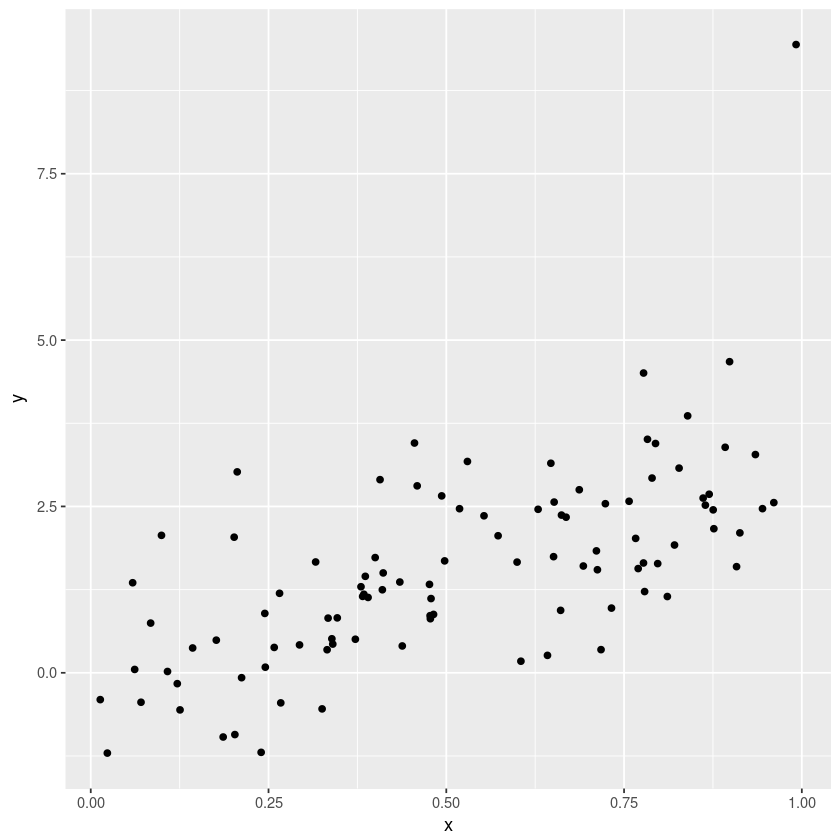

In [29]:
data.frame(x = x, y = y) %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()

In [30]:
erros <- data.frame(polinomio = 1:9, erro_teste = numeric(9), erro_treino = numeric(9))
for(i in erros$polinomio){

  modelo <- lm(y ~ poly(x, i), data = data.frame(x1 = x, y = y))
  erros$erro_teste[i] <- sqrt(mean((predict(modelo, data.frame(x = x_novo)) - y_novo)^2))
  erros$erro_treino[i] <- sqrt(mean((predict(modelo, data.frame(x = x)) - y)^2))

}

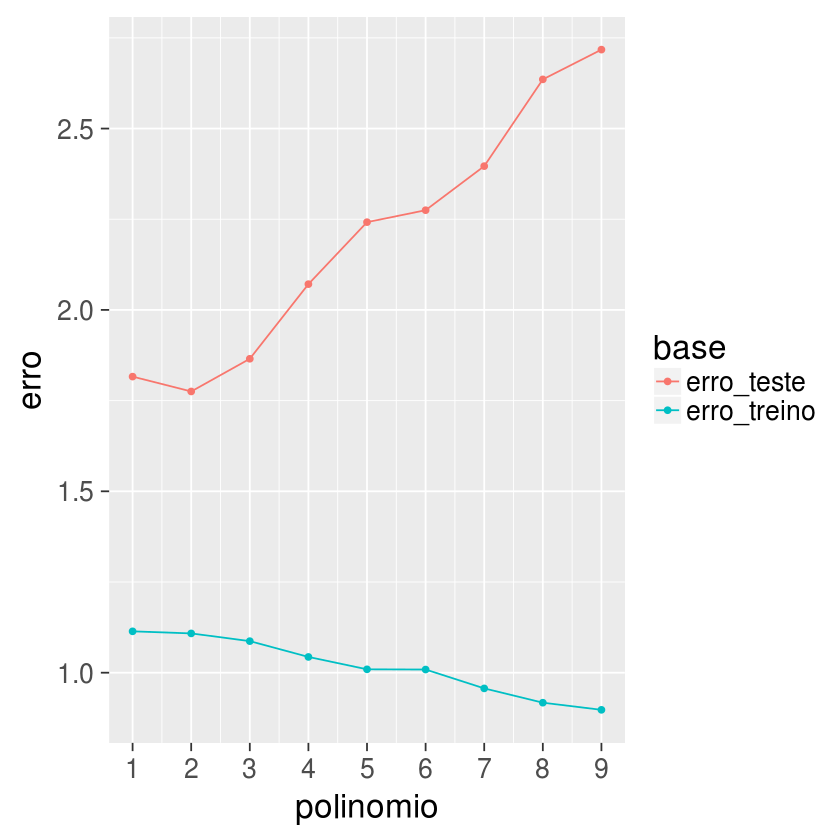

In [31]:
erros %>%
  gather(base, erro, starts_with("erro")) %>%
  ggplot(aes(x = polinomio, y = erro, colour = base)) +
  geom_point() +
  geom_line() +
  scale_x_continuous(breaks  = 1:12) +
  theme_gray(20)

In [32]:
K <- 1:5
folds <- rep(1:5, l = length(x)) %>% sample

In [34]:
erros_cv <- NULL
for(k in K){

  x_treino <- x[folds != k]
  x_valid <- x[folds == k]

  y_treino <- y[folds != k]
  y_valid <- y[folds == k]

  erros <- data.frame(polinomio = 1:9, erro_valid = numeric(9), erro_treino = numeric(9))
  for(i in erros$polinomio){

    modelo <- lm(y ~ poly(x, i), data.frame(x = x_treino, y = y_treino))
    erros$erro_valid[i] <- sqrt(mean((predict(modelo, data.frame(x = x_valid)) - y_valid)^2))
    erros$erro_treino[i] <- sqrt(mean((predict(modelo, data.frame(x = x_treino)) - y_treino)^2))

  }

  erros_cv <- rbind(erros_cv, erros)

}

No summary function supplied, defaulting to `mean_se()


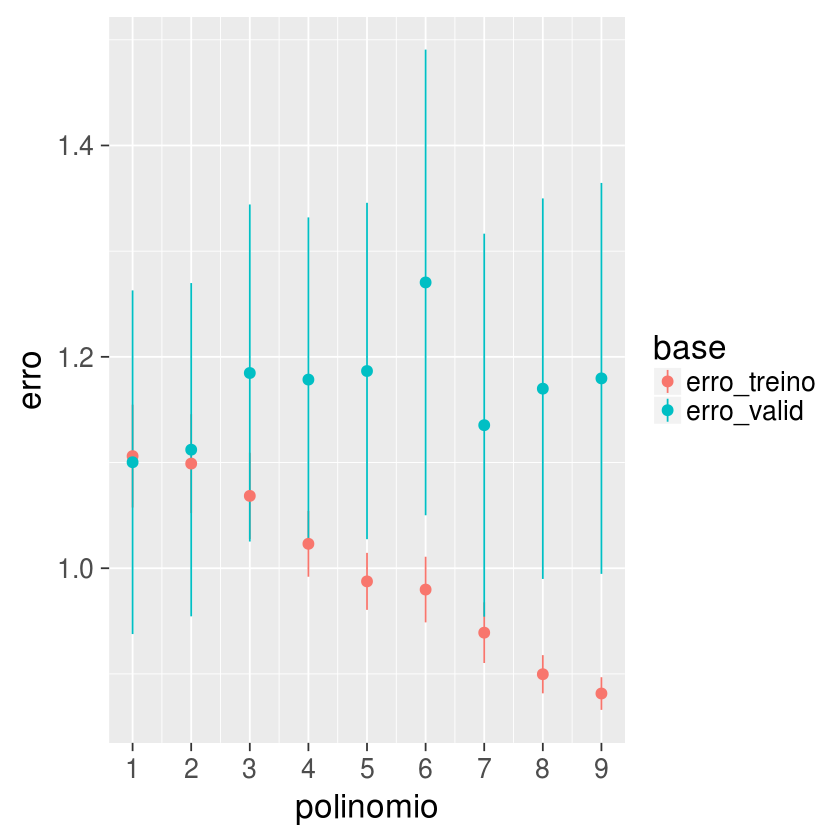

In [35]:
erros_cv %>%
  gather(base, erro, starts_with("erro")) %>%
  ggplot(aes(x = polinomio, y = erro, colour = base)) +
  stat_summary() +
  scale_x_continuous(breaks  = 1:12) +
  theme_gray(20)